#**Student Percentage Detection | The Sparks Foundation Task 3 | August21 | DataScience**

### Author: Nimra Khan

Problem statement :

Predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.
You can use R, Python, SAS Enterprise Miner or any other tool.
What will be predicted score if a student studies for 9.25 hrs/ day?


In [25]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

#**LOADING THE DATASET**

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# number of rows and columns in the dataset
df.shape

(25, 2)

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#**PREPROCESSING THE DATASET**

In [ ]:
# checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No Missing Value Found in data

#**EXPLORATORY DATA ANALYSIS**

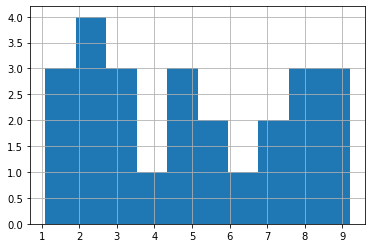

In [ ]:
df['Hours'].hist()

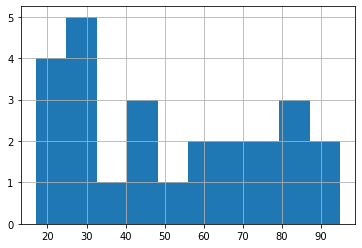

In [ ]:
df['Scores'].hist()

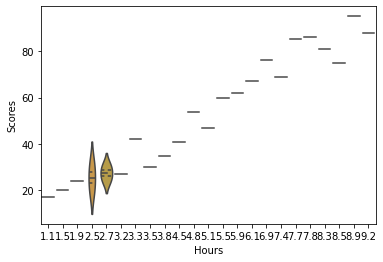

In [ ]:
import seaborn as sns
sns.violinplot(y='Scores', x='Hours', data=df, inner='quartile')
plt.show()

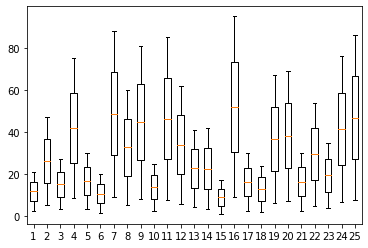

In [6]:
plt.boxplot(df)
plt.show()


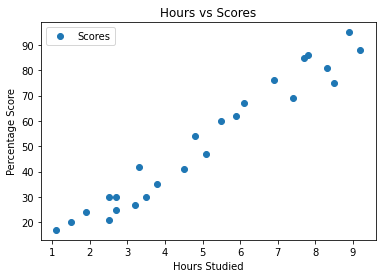

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

This "SCATTER PLOT" indicates positive linear relationship as much as hours You study is a chance of high scoring

#**MODEL TRAINING**

In [8]:
#we are extracting the values of hours data into variable X and the values of scores data into variable y
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0)

In [14]:
## We have Splitted Our Data Using 80:20 RULe(PARETO)
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


In [15]:
model = LinearRegression()  
model.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
##plotting the REGRESSION LINE---
Y0 = model.intercept_ + model.coef_*X_train

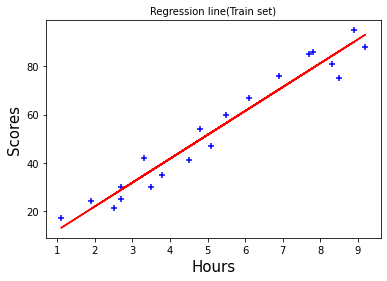

In [19]:
##plotting on train data
plt.scatter(X_train,Y_train,color='blue',marker='+')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=10)
plt.show()


In [21]:
Y_pred=model.predict(X_test)##predicting the Scores for test data
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


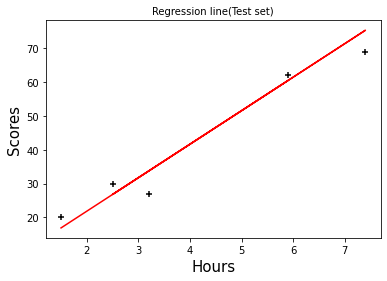

In [22]:
#plotting line on test data
plt.plot(X_test,Y_pred,color='red')
plt.scatter(X_test,Y_test,color='black',marker='+')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=10)
plt.show()


#**Comparing Actual vs Predicted Scores**

In [23]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#**ACCURACY OF THE MODEL**

In [26]:
metrics.r2_score(Y_test,Y_pred)##Goodness of fit Test

0.9454906892105354

Above 94% percentage indicates that above fitted Model is a GOOD MODEL.

#**Predicting the score**

In [27]:
Prediction_score = model.predict([[9.25]])
print("predicted score for a student studying 9.25 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [93.69173249]


From the above result we can say that if a studied for 9.25 then student will secured 93.69 MARKS

In [28]:
#lets predict some more 
Prediction_score = model.predict([[2]])
print("predicted score for a student studying 2 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [21.839473]


In [30]:
Prediction_score = model.predict([[5.30]])
print("predicted score for a student studying 5.30 hours :",Prediction_score)

predicted score for a student studying 9.25 hours : [54.54463939]
